In [7]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import itertools as it
from scipy.special import comb
from scipy.stats import linregress

import matplotlib
font = {'size'   : 11}
matplotlib.rc('font', **font)

In [8]:
#'''
data_s = np.loadtxt('synthmeasuresAuto_NOrder_3.txt')
data_d = np.loadtxt('synthmeasuresDense_NOrder_3.txt')

data_s2 = np.loadtxt('synthmeasuresAuto_Skeleton_3.txt')
data_d2 = np.loadtxt('synthmeasuresDense_Skeleton_3.txt')

data_s3 = np.loadtxt('synthmeasuresAuto_NOrder_1p3.txt')
data_d3 = np.loadtxt('synthmeasuresDense_NOrder_1p3.txt')

data_s4 = np.loadtxt('synthmeasuresAuto_Skeleton_1p3.txt')
data_d4 = np.loadtxt('synthmeasuresDense_Skeleton_1p3.txt')

#data_s5 = np.loadtxt('synthmeasuresAuto_NOrder_5.txt')
data_d5 = np.loadtxt('synthmeasuresDense_NOrder_5.txt')

#data_s3 = np.loadtxt('synthmeasuresAuto_NOrder_.txt')
data_d6 = np.loadtxt('synthmeasuresDense_Skeleton_5.txt')

In [9]:
data_s = np.concatenate((data_s[data_s[:,0]==60],data_s3[data_s3[:,0]==60]),axis=0)
data_d = np.concatenate((data_d[data_d[:,0]==60],data_d3[data_d3[:,0]==60],data_d5[data_d5[:,0]==60]),axis=0)
data_s2 = np.concatenate((data_s2[data_s2[:,0]==60],data_s4[data_s4[:,0]==60]),axis=0)
data_d2 = np.concatenate((data_d2[data_d2[:,0]==60],data_d4[data_d4[:,0]==60],data_d6[data_d6[:,0]==60]),axis=0)

In [10]:
colors=['tab:blue','tab:cyan','tab:red','tab:orange','tab:green','tab:olive','tab:purple','tab:pink','k','tab:gray']
legends=['G2PC', 'FisherPC', 'G2Connected', 'FisherConnected', 'G2Knee', 'FisherKnee', 'G2pvalConnected', 'G2pvalKnee', 'NIConnected', 'NIKnee'] 
data=[data_s,data_d,data_s2,data_d2]
title=['DAG/Controlled','DAG/Matrix','Skeleton/Controlled','Skeleton/Matrix']
base=np.array([2,6,13,20,27,34,41,48,55,62])

base=np.array([2,6,20,34,41,48,55,62])
legends=['G2PC', 'FisherPC', 'FisherConnected', 'FisherKnee', 'G2Connected', 'G2Knee', 'NIConnected', 'NIKnee']

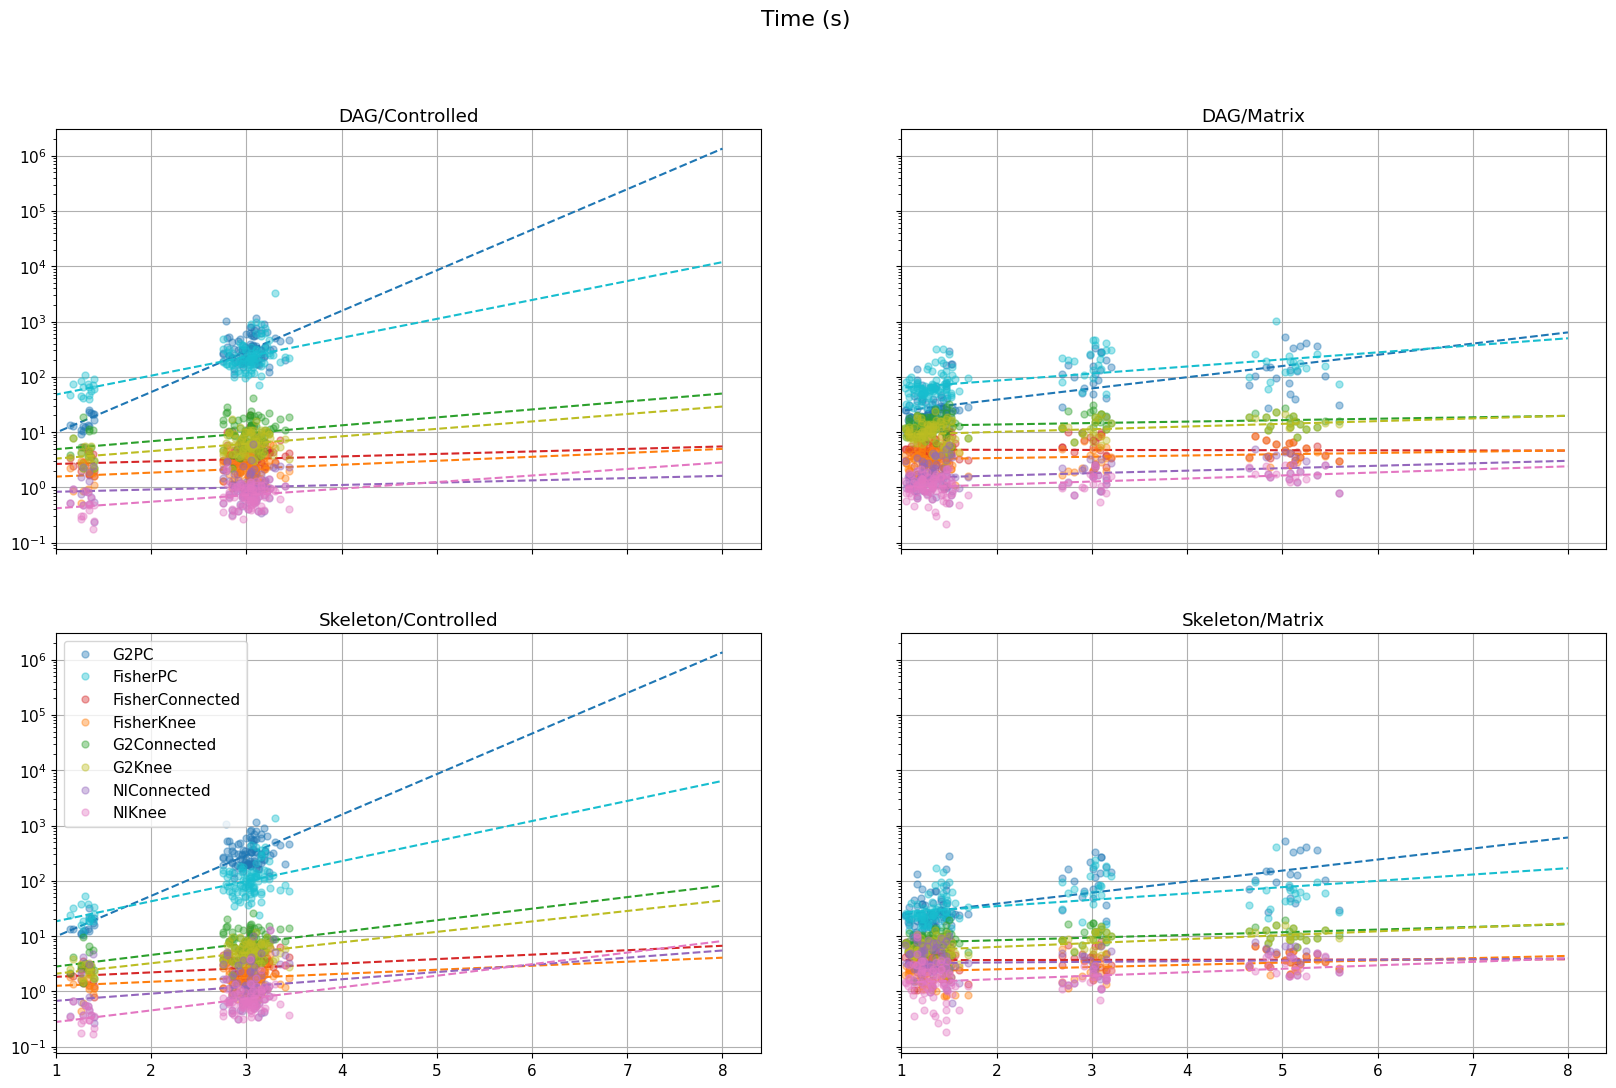

In [11]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base
for j in range(4):
    kk = data[j][:,1]/2
    
    for i in range(len(columns)):
        axe[j].plot(kk,data[j][:,columns[i]],marker='.',linestyle='',color=colors[i],markersize=10,label=legends[i],alpha=0.4)
        m,d = linregress(kk,np.log(data[j][:,columns[i]]))[:2]
        axe[j].plot(np.linspace(0,8,100),np.exp(m*np.linspace(0,8,100)+d),marker='',linestyle='--',color=colors[i])
        
    axe[j].title.set_text(title[j])
    axe[j].grid()

axe[2].legend()
pl.xlim(1)
pl.suptitle("Time (s)",fontsize="x-large")
pl.yscale("log")
pl.show()

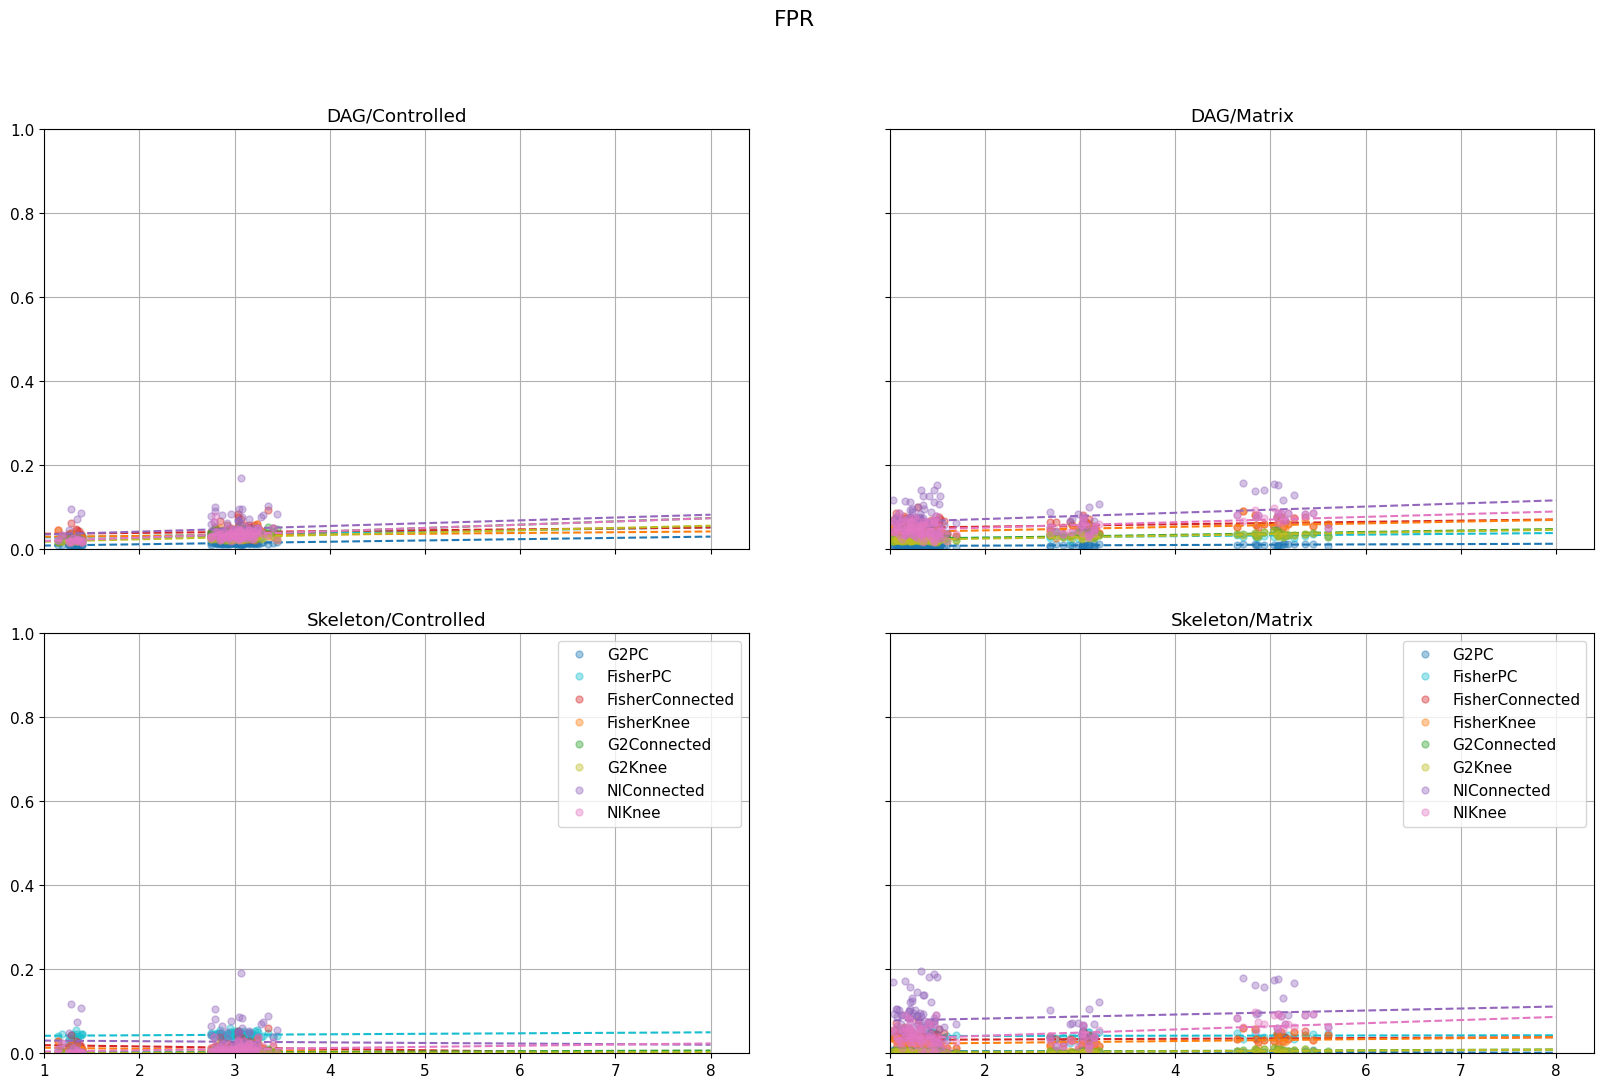

In [12]:
#False Positive Rate
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=base+1
for j in range(4):
    kk = data[j][:,1]/2
    
    for i in range(len(columns)):
        axe[j].plot(kk,data[j][:,columns[i]],marker='.',linestyle='',color=colors[i],markersize=10,label=legends[i],alpha=0.4)
        m,d = linregress(kk,data[j][:,columns[i]])[:2]
        axe[j].plot(np.linspace(0,8,100),m*np.linspace(0,8,100)+d,marker='',linestyle='--',color=colors[i])
        

    axe[j].title.set_text(title[j])
    axe[j].grid()
    
axe[2].legend()
pl.suptitle("FPR",fontsize="x-large")
pl.xlim(1)
pl.ylim(0,1)
pl.legend()
pl.show()

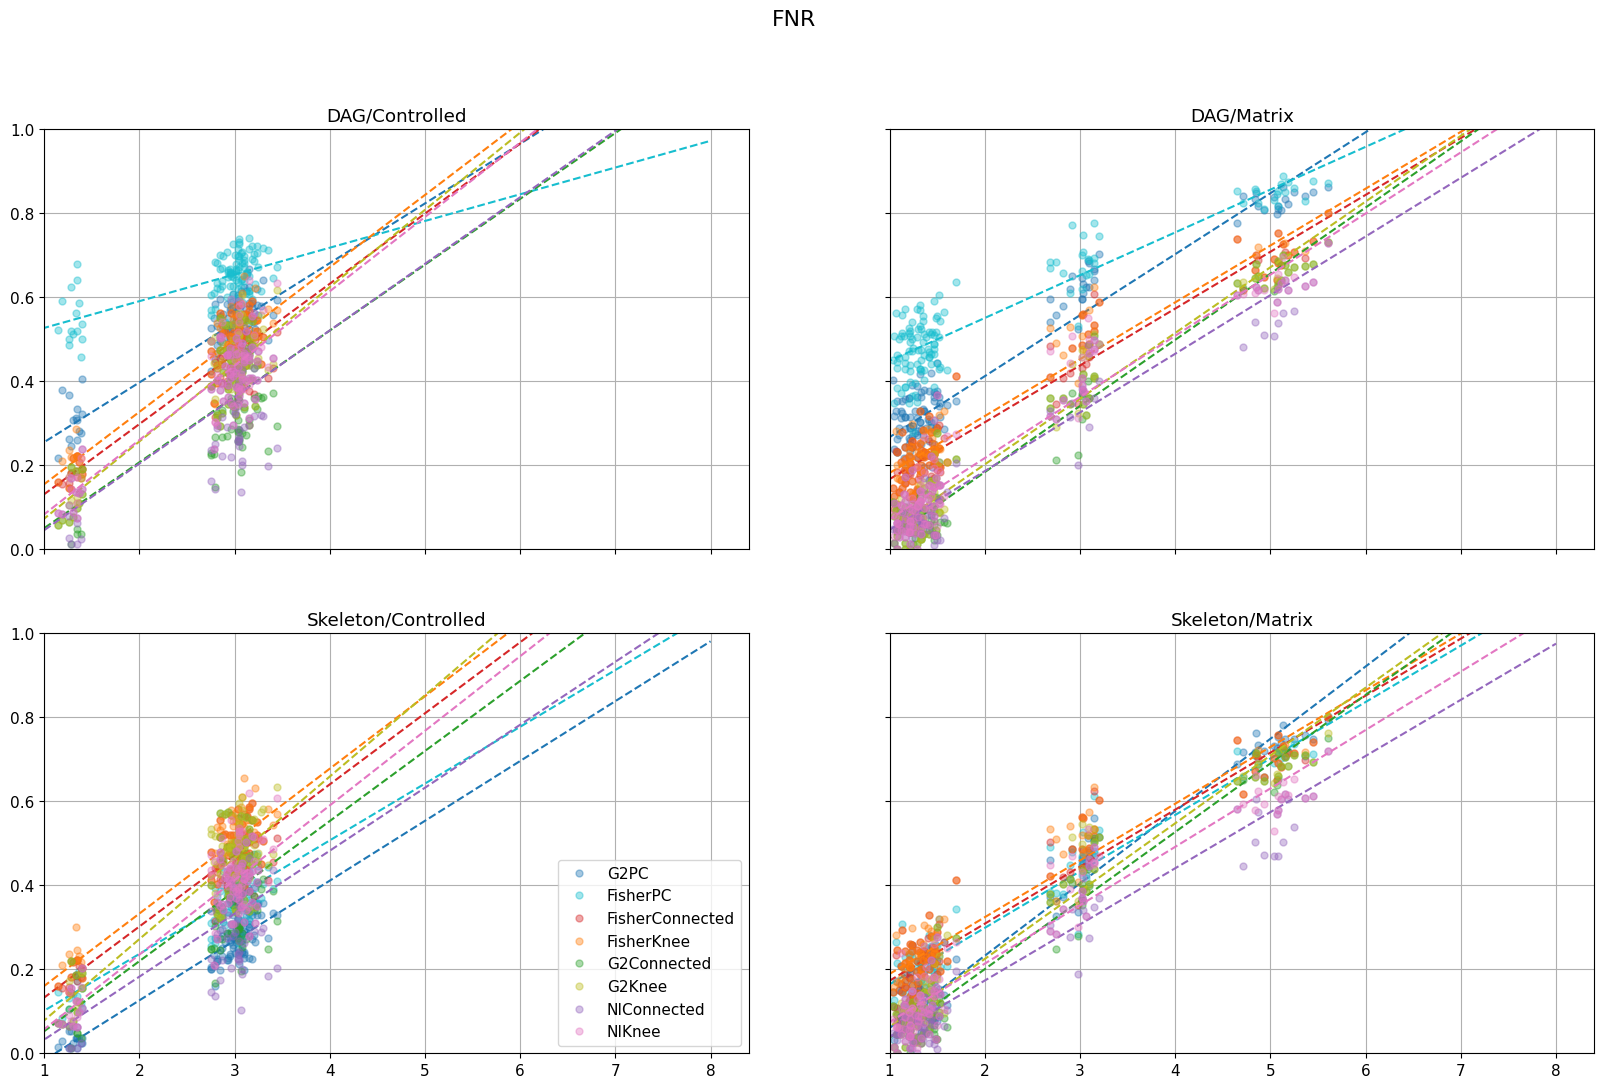

In [13]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=base+2
for j in range(4):
    kk = data[j][:,1]/2
    
    for i in range(len(columns)):
        axe[j].plot(kk,data[j][:,columns[i]],marker='.',linestyle='',color=colors[i],markersize=10,label=legends[i],alpha=0.4)
        m,d = linregress(kk,data[j][:,columns[i]])[:2]
        axe[j].plot(np.linspace(0,8,100),m*np.linspace(0,8,100)+d,marker='',linestyle='--',color=colors[i])
        

    axe[j].title.set_text(title[j])
    axe[j].grid()
    
axe[2].legend()
pl.suptitle("FNR",fontsize="x-large")
pl.xlim(1)
pl.ylim(0,1)
pl.show()

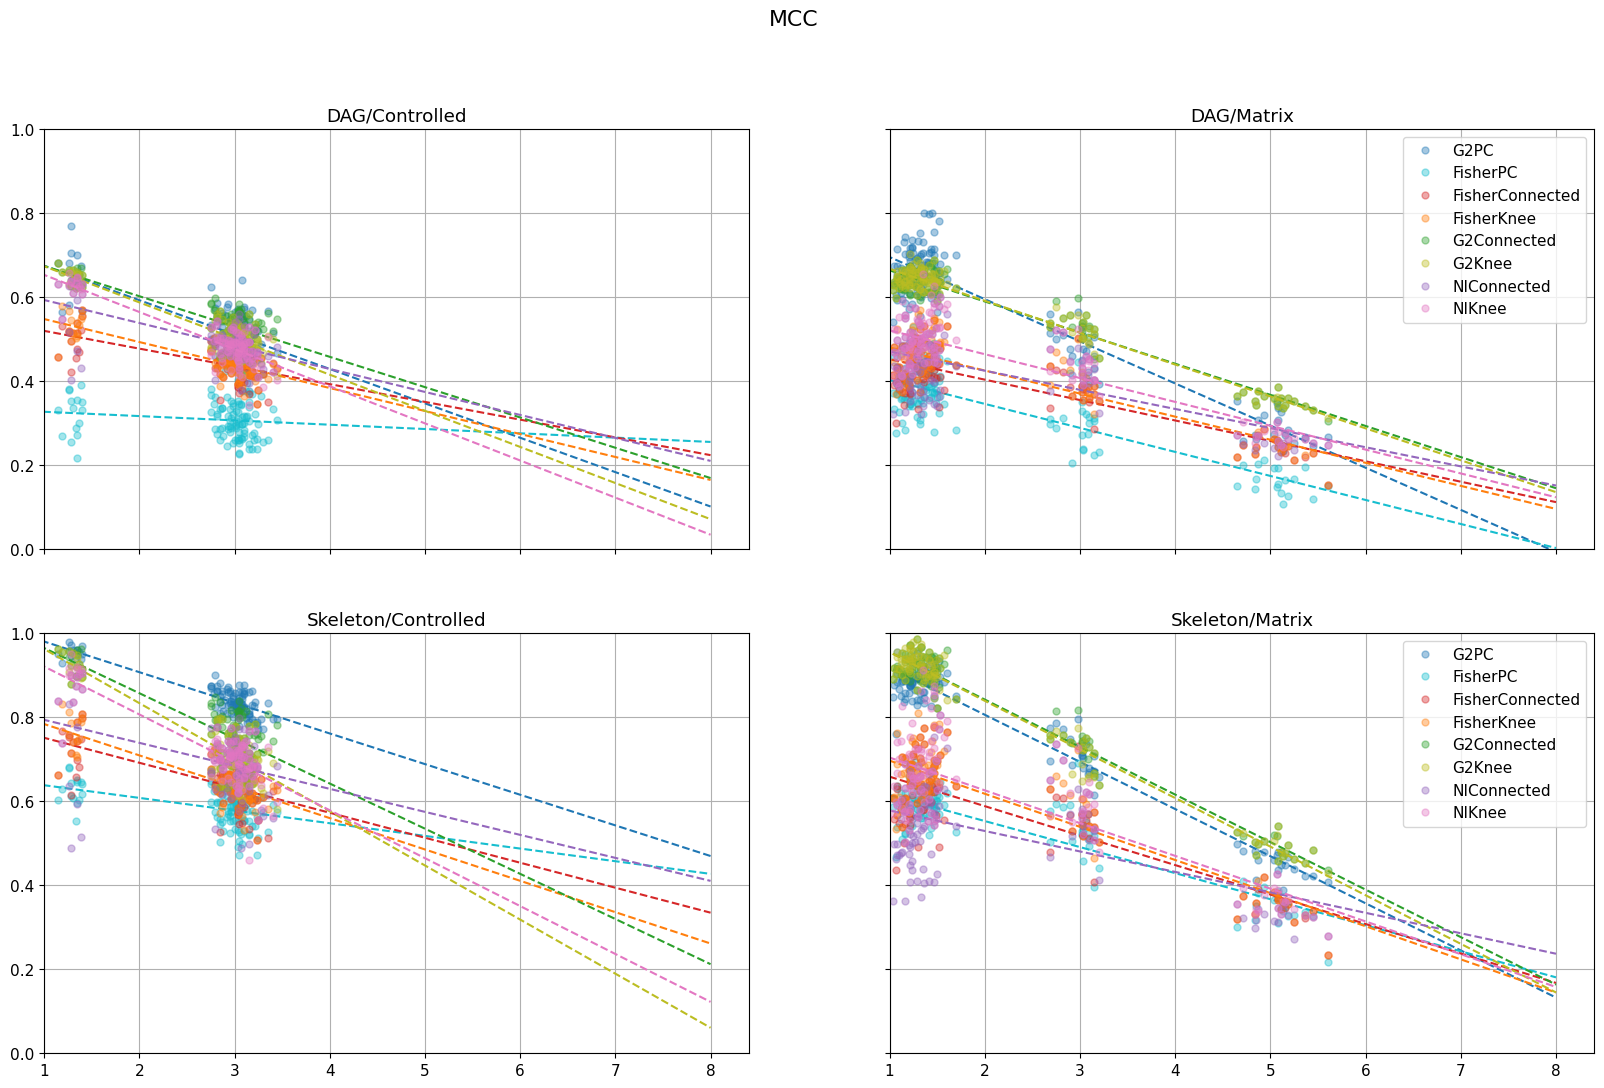

In [14]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=base+3
for j in range(4):
    kk = data[j][:,1]/2
    
    for i in range(len(columns)):
        axe[j].plot(kk,data[j][:,columns[i]],marker='.',linestyle='',color=colors[i],markersize=10,label=legends[i],alpha=0.4)
        m,d = linregress(kk,data[j][:,columns[i]])[:2]
        axe[j].plot(np.linspace(0,8,100),m*np.linspace(0,8,100)+d,marker='',linestyle='--',color=colors[i])
        

    axe[j].title.set_text(title[j])
    axe[j].grid()
    
axe[1].legend()
axe[3].legend()
pl.suptitle("MCC",fontsize="x-large")
pl.xlim(1)
pl.ylim(0,1)
pl.show()

In [15]:
len(data[0])

104

/tmp/ipykernel_117882/2970220622.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  pl.ylim(0,1e4)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


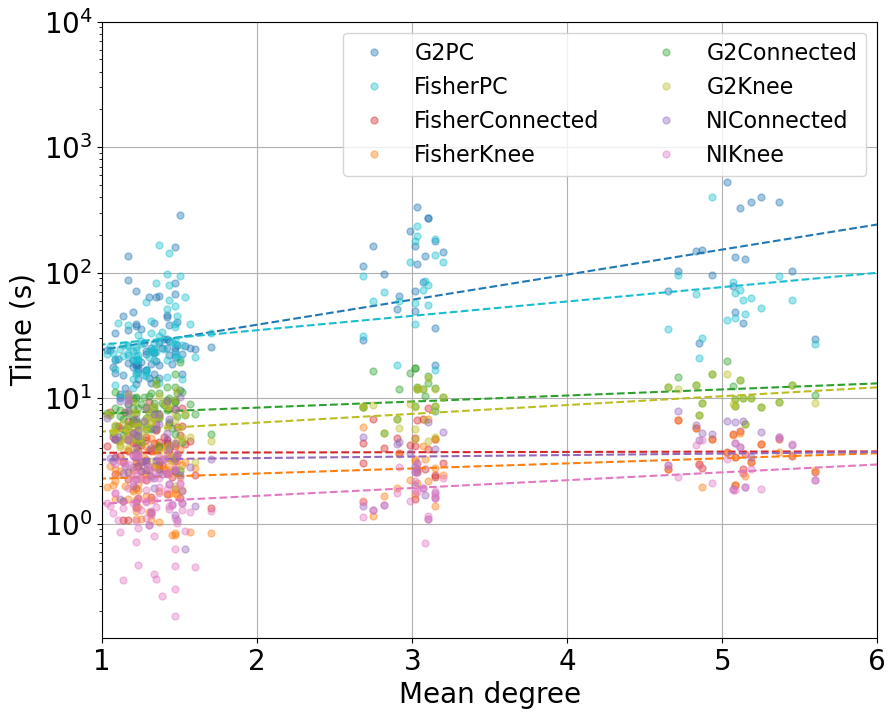

In [16]:
pl.figure(figsize=(10,8))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns = base
j=3

#Plot PC algorithm
kk = data[j][:,1]/2
for i in range(len(columns)):
    pl.plot(kk,data[j][:,columns[i]],marker='.',linestyle='',color=colors[i],markersize=10,label=legends[i],alpha=0.4)
    m,d = linregress(kk,np.log(data[j][:,columns[i]]))[:2]
    pl.plot(np.linspace(0,8,100),np.exp(m*np.linspace(0,8,100)+d),marker='',linestyle='--',color=colors[i])
        
pl.grid()

pl.xlim(1,6)
pl.yscale("log")
pl.ylim(0,1e4)
#l.ylim(0,10000)
pl.legend(ncols=2,prop={'size': 16})
pl.ylabel("Time (s)")
pl.xlabel("Mean degree")
pl.savefig("Time_DenseNO_meangeg.eps",format='eps')
pl.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


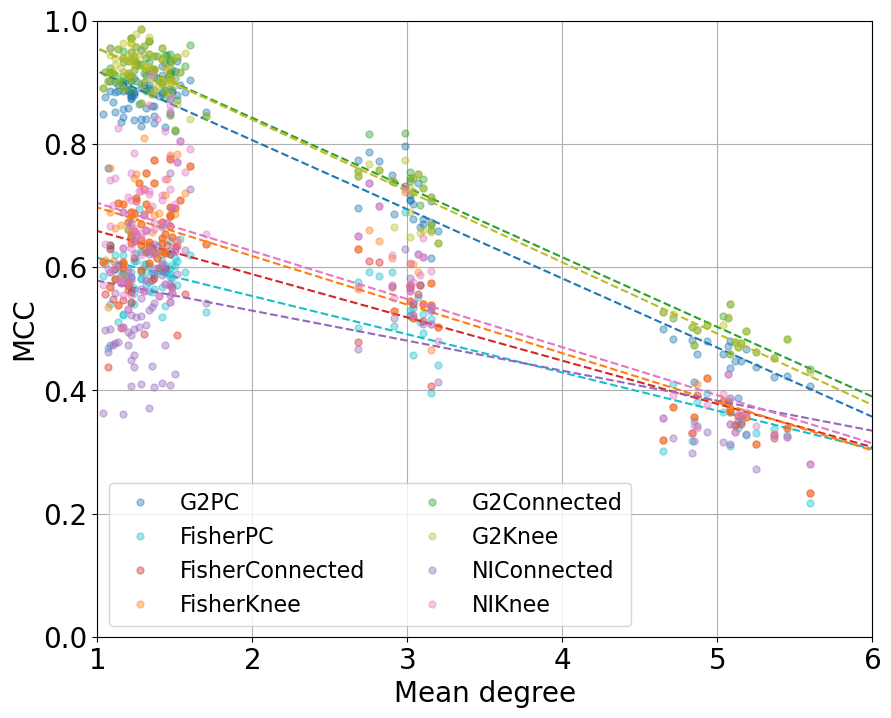

In [17]:
pl.figure(figsize=(10,8))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns = base+3

j=3
kk = data[j][:,1]/2
for i in range(len(columns)):
    pl.plot(kk,data[j][:,columns[i]],marker='.',linestyle='',color=colors[i],markersize=10,label=legends[i],alpha=0.4)
    m,d = linregress(kk,data[j][:,columns[i]])[:2]
    pl.plot(np.linspace(0,8,100),m*np.linspace(0,8,100)+d,marker='',linestyle='--',color=colors[i])

pl.grid()

pl.xlim(1,6)
pl.ylim(0,1)
pl.legend(ncols=2,prop={'size': 16})
pl.ylabel("MCC")
pl.xlabel("Mean degree")
pl.savefig("MCC_DenseNO_meangeg.eps",format='eps')
pl.show()